In [0]:
%matplotlib inline
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

    time  x_acc  y_acc  z_acc  x_gyro  y_gyro  z_gyro label
0  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
1  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
2  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
3  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a
4  10000  0.092 -0.041 -0.028  11.265   2.235    9.82     a


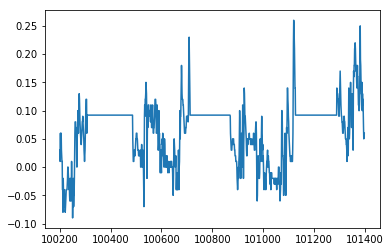

In [0]:
# Loading the data
df = pd.read_csv('all_data/all.csv', names = ['time', 'x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro', 'label'])
print(df.head())
# print(df['label'][100800 : 100801])
plt.plot(df['x_acc'][100200 : 101400])

In [0]:
# Normalizing the data and making the labels one_hot
labels = pd.DataFrame(pd.get_dummies(df['label'], prefix='label'))
print(labels.head())
df = df.drop('label', axis = 1)
df = (df - df.min()) / (df.max() - df.min())
print(df.head())
dataframe = pd.concat([df, labels], axis = 1).reset_index(drop = False)
print(dataframe.tail())
dataframe.to_csv('final_data/all_data.csv', index = None)

       label_a  label_b  label_c  label_d  label_e  label_f  label_g  label_h  \
time                                                                            
10000        1        0        0        0        0        0        0        0   
10000        1        0        0        0        0        0        0        0   
10000        1        0        0        0        0        0        0        0   
10000        1        0        0        0        0        0        0        0   
10000        1        0        0        0        0        0        0        0   

       label_i  
time            
10000        0  
10000        0  
10000        0  
10000        0  
10000        0  
          x_acc     y_acc     z_acc   x_gyro    y_gyro    z_gyro
time                                                            
10000  0.479503  0.683088  0.530579  0.84696  0.529894  0.347786
10000  0.479503  0.683088  0.530579  0.84696  0.529894  0.347786
10000  0.479503  0.683088  0.530579  0.84696  0.52989

In [0]:
final = pd.read_csv('final_data/all_data.csv', header = 0, index_col = 0)
# shuffling the dataset before splitting
# But shuffling each complete time series and not individual samples.
threed = final.values.reshape(-1, 400, final.shape[1])
np.random.shuffle(threed)

twod = threed.reshape(-1, final.shape[1])
# print(twod.shape)
# total = 65700
# reqd_len = 300
# train_samples = reqd_len * (int(0.8 * twod.shape[0] // reqd_len)) # 52500
# val_samples = reqd_len * (int(0.1 * twod.shape[0] // reqd_len)) # 6600
# print(train_samples)
# print(val_samples)
train_df = pd.DataFrame(twod[ : 171600])
val_df = pd.DataFrame(twod[171600 : (171600 + 21200)])
test_df = pd.DataFrame(twod[(171600 + 21200) : ])
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

train_df.to_csv('final_data/train.csv', index = False, header = False)
val_df.to_csv('final_data/val.csv', index = False, header = False)
test_df.to_csv('final_data/test.csv', index = False, header = False)

(171600, 15)
(21200, 15)
(21200, 15)


In [0]:
print(len(train_df))
print(len(test_df))
print(len(val_df))

52500
6600
6600
